<a href="https://colab.research.google.com/github/shranya12/LLM-Reinforcement-learning/blob/main/603_FINAL_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA 603 Platforms for Big Data Processing**
## ***Project: Cyber Security Threat Detection Using Big Data***

**Members:** Mitaali Patel, Shranya Gandham, Mrunal Jadhav, Jayanth Rachuri


In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
drive.mount("/content/drive")
file_path = "/content/drive/My Drive/603_Project/dataset.csv"

df = pd.read_csv(file_path)

Mounted at /content/drive


# **EDA**

In [ ]:
# Load the data
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,19.92,6,63.36,25893.962218,0.0,0.0,0.0,0.99,0.99,0.0,...,6421,60,481,64.21,42.100000,64.21,0.000039,100,1772.410000,DDOS-PSHACK_FLOOD
1,0.00,47,64.00,3703.841331,0.0,0.0,0.0,0.00,0.00,0.0,...,57320,98,578,573.20,48.000000,573.20,0.000271,100,2304.000000,MIRAI-GREIP_FLOOD
2,7.92,17,65.91,19673.095685,0.0,0.0,0.0,0.00,0.00,0.0,...,6010,60,70,60.10,1.000000,60.10,0.000057,100,1.000000,DOS-UDP_FLOOD
3,20.40,6,110.50,261.664826,0.1,0.0,0.3,0.20,0.40,0.0,...,2223,54,1500,222.30,451.596686,222.30,0.004766,10,203939.566667,DNS_SPOOFING
4,0.32,1,63.96,28944.199848,0.0,0.0,0.0,0.00,0.01,0.0,...,6006,60,66,60.06,0.600000,60.06,0.000035,100,0.360000,DDOS-ICMP_FLOOD


In [ ]:
df.tail()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
712306,20.0,6,64.00,33177.535200,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.0,60.00,0.000034,100,0.00,DDOS-SYN_FLOOD
712307,8.0,17,64.00,49038.980475,0.00,0.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.0,60.00,0.000020,100,0.00,DOS-UDP_FLOOD
712308,20.0,6,67.82,10496.518932,0.98,0.0,0.98,0.01,0.02,0.0,...,6061,60,121,60.61,6.1,60.61,0.000102,100,37.21,DDOS-RSTFINFLOOD
712309,20.0,6,64.00,23321.123158,0.00,1.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.0,60.00,0.000048,100,0.00,DDOS-SYNONYMOUSIP_FLOOD
712310,0.0,1,64.00,49778.115357,0.00,0.0,0.00,0.00,0.00,0.0,...,6000,60,60,60.00,0.0,60.00,0.000020,100,0.00,DDOS-ICMP_FLOOD


In [ ]:
df.describe()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
count,712311.000000,712311.000000,712311.000000,7.123110e+05,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,...,712311.000000,712311.000000,712311.000000,712311.000000,712311.000000,712300.000000,712311.000000,712311.000000,712311.000000,7.123000e+05
mean,13.756737,9.086656,66.526660,inf,0.087460,0.206699,0.093386,0.094068,0.129968,0.000029,...,0.997183,10908.933592,79.884170,222.500479,130.897583,41.118678,130.897583,0.001900,95.508984,3.466137e+04
std,8.718496,9.082485,14.375848,NaN,0.280119,0.399664,0.283992,0.277324,0.316820,0.001848,...,0.018851,16764.737387,106.883922,586.944193,227.672158,181.578269,227.672158,0.883177,19.556937,4.118891e+05
min,0.000000,0.000000,0.000000,1.349521e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,60.000000,42.000000,54.000000,48.400000,0.000000,48.400000,0.000000,1.000000,0.000000e+00
25%,8.000000,6.000000,64.000000,1.141929e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000027,100.000000,0.000000e+00
50%,20.000000,6.000000,64.000000,2.461302e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6000.000000,60.000000,60.000000,60.000000,0.000000,60.000000,0.000041,100.000000,0.000000e+00
75%,20.000000,17.000000,64.000000,3.797812e+04,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,...,1.000000,6010.000000,60.000000,74.000000,60.240000,0.600000,60.240000,0.000089,100.000000,3.600000e-01
max,60.000000,47.000000,255.000000,inf,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,...,1.000000,239413.000000,2974.000000,30474.000000,5367.500000,9533.007818,5367.500000,741.003442,100.000000,9.087824e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712311 entries, 0 to 712310
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Header_Length    712311 non-null  float64
 1   Protocol Type    712311 non-null  int64  
 2   Time_To_Live     712311 non-null  float64
 3   Rate             712311 non-null  float64
 4   fin_flag_number  712311 non-null  float64
 5   syn_flag_number  712311 non-null  float64
 6   rst_flag_number  712311 non-null  float64
 7   psh_flag_number  712311 non-null  float64
 8   ack_flag_number  712311 non-null  float64
 9   ece_flag_number  712311 non-null  float64
 10  cwr_flag_number  712311 non-null  float64
 11  ack_count        712311 non-null  int64  
 12  syn_count        712311 non-null  int64  
 13  fin_count        712311 non-null  int64  
 14  rst_count        712311 non-null  int64  
 15  HTTP             712311 non-null  float64
 16  HTTPS            712311 non-null  floa

In [ ]:
# Handle missing values
df = df.dropna()
print(f"Data after dropping missing values:\n{df.isnull().sum()}")

Data after dropping missing values:
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64


## **Data Pre-processing**

In [ ]:
# Encoding categorical columns
label_encoder = LabelEncoder()
df['Protocol Type'] = label_encoder.fit_transform(df['Protocol Type'])
df['Label'] = label_encoder.fit_transform(df['Label'])

<ipython-input-7-afedadea415f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Protocol Type'] = label_encoder.fit_transform(df['Protocol Type'])


In [ ]:
# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Header_Length', 'Time_To_Live', 'Rate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
                     'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
                     'fin_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
                     'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size',
                     'IAT', 'Number', 'Variance']

# Check for infinite values in numerical columns
infinite_values = np.isinf(df[numerical_columns]).sum()
print(f"Infinite values in columns:\n{infinite_values}")

# Replace inf and -inf with NaN and drop those rows
df[numerical_columns] = df[numerical_columns].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=numerical_columns)

# Scale numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Infinite values in columns:
Header_Length      0
Time_To_Live       0
Rate               3
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
dtype: int64


In [ ]:
# Check for outliers using Z-score
z_scores = np.abs(zscore(df[numerical_columns]))
outliers = (z_scores > 3).any(axis=1)
print(f"Outliers:\n{df[outliers]}")

# Remove the outliers
df = df[~outliers]

Outliers:
        Header_Length  Protocol Type  Time_To_Live      Rate  fin_flag_number  \
0            0.706926              2     -0.220286 -0.083558        -0.312228   
3            0.761982              2      3.059192 -0.932518         0.044760   
5            0.716102              2     -0.175762  0.624798        -0.312228   
6            0.716102              2     -0.175762  2.360891        -0.312228   
9            4.386480              2     -0.175762  9.744841        -0.312228   
...               ...            ...           ...       ...              ...   
712297       0.716102              2     -0.175762 -0.444995        -0.312228   
712300       0.743630              2     -0.175762 -0.729306        -0.312228   
712302       2.092494              2      3.309640 -0.935328        -0.312228   
712308       0.716102              2      0.089991 -0.593533         3.186259   
712309       0.716102              2     -0.175762 -0.168773        -0.312228   

        syn_flag_

In [ ]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Number of duplicate rows: 131191


In [ ]:
df.head()

,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
1,-1.577884,4,-0.175762,-0.818511,-0.312228,-0.517181,-0.328836,-0.339196,-0.410219,-0.015487,...,2.768347,0.169637,0.605689,1.942897,0.037896,1.942897,-0.001845,0.229594,-0.078559,23
2,-0.669465,3,-0.042886,-0.289598,-0.312228,-0.517181,-0.328836,-0.339196,-0.410219,-0.015487,...,-0.292227,-0.186036,-0.259813,-0.310955,-0.220945,-0.310955,-0.002086,0.229594,-0.084150,21
4,-1.541180,1,-0.178545,0.017468,-0.312228,-0.517181,-0.328836,-0.339196,-0.378655,-0.015487,...,-0.292466,-0.186036,-0.266628,-0.311131,-0.223148,-0.311131,-0.002112,0.229594,-0.084152,6
7,0.812450,2,-0.175762,0.004610,-0.312228,1.984922,-0.328836,-0.339196,0.252630,-0.015487,...,0.244372,-0.186036,-0.082623,0.084205,0.030555,0.084205,-0.002111,0.229594,-0.078865,12
8,-0.660289,3,-0.175762,0.500176,-0.312228,-0.517181,-0.328836,-0.339196,-0.410219,-0.015487,...,-0.292824,-0.186036,-0.276850,-0.311395,-0.226452,-0.311395,-0.002126,0.229594,-0.084152,14


In [ ]:
# Split features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (273067, 39), Testing data shape: (68267, 39)


In [ ]:
# Save the preprocessed data (optional)
#preprocessed_file_path = "/content/preprocessed_data.csv"
#df.to_csv(preprocessed_file_path, index=False)
#print(f"Preprocessed data saved to {preprocessed_file_path}")

## **Analyzing IoT-specific traffic behaviors**

In [ ]:
label_encoder = LabelEncoder()
df['Label_encoded'] = label_encoder.fit_transform(df['Label'])

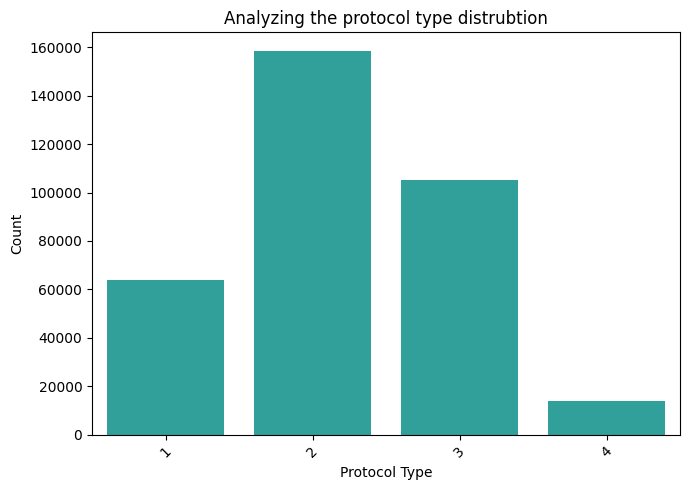

In [ ]:
#Analyzing the behaviour: Analyze Protocol Type

plt.figure(figsize=(7,5))
sns.countplot(x='Protocol Type', data=df, color='lightseagreen')
plt.title('Analyzing the protocol type distrubtion')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

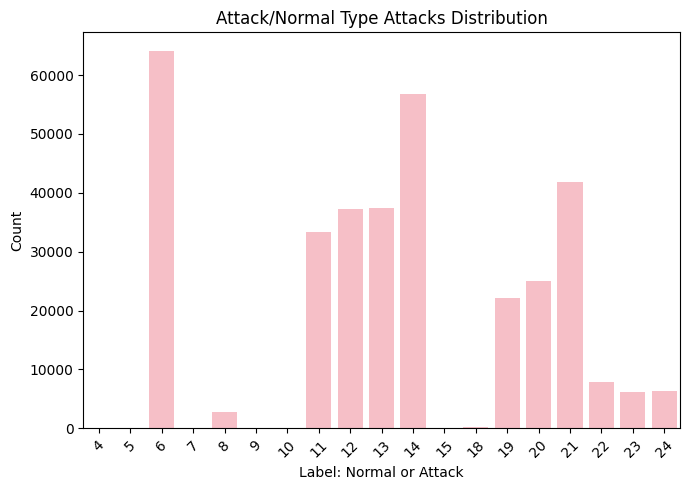

In [ ]:
#Analyzing the behaviour: 2. Attack/Normal Type Attacks
plt.figure(figsize=(7, 5))
sns.countplot(x='Label', data=df, color='lightpink')
plt.title('Attack/Normal Type Attacks Distribution')
plt.xlabel('Label: Normal or Attack')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Correlation Matrix**

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


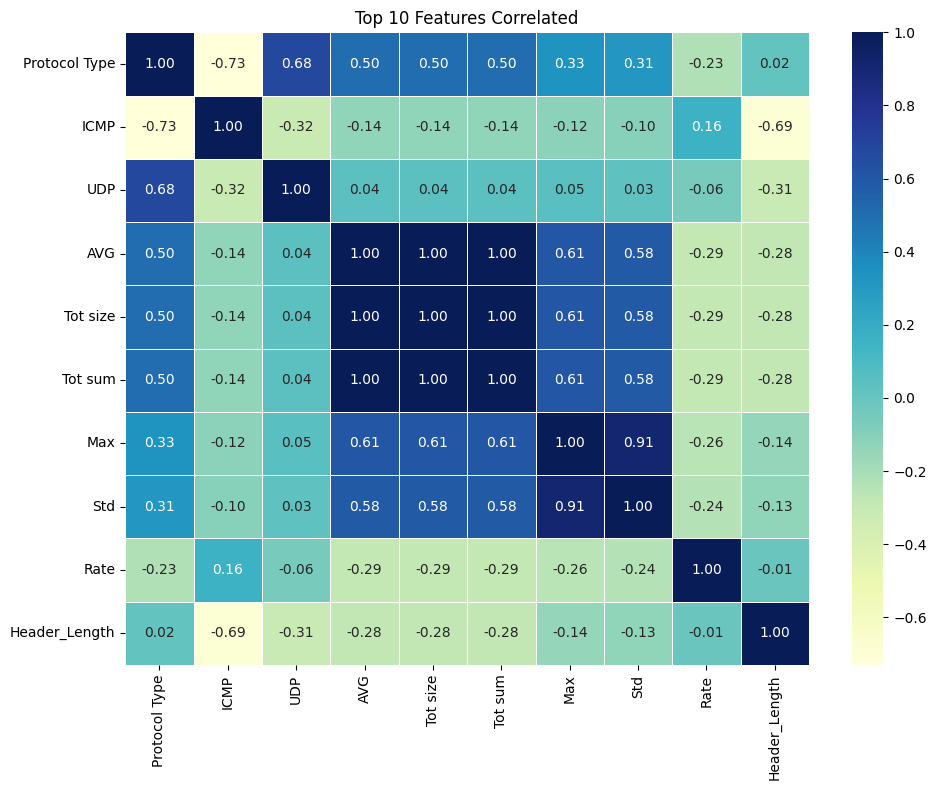

In [ ]:
if 'Label_encoded' not in df.columns:
    encoder = LabelEncoder()
    df['Label_encoded'] = encoder.fit_transform(df['Label'])

numerical_col = df.select_dtypes(include=[np.number]).drop(columns=['Label', 'Label_encoded'], errors='ignore')
corr_matrix = numerical_col.corrwith(df['Label_encoded']).abs().sort_values(ascending=False)

feature_names = corr_matrix.head(10).index.tolist()

selected = df[feature_names].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(selected, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
plt.title('Top 10 Features Correlated')
plt.tight_layout()
plt.show()


In [ ]:
#Top correlated features
print('Top ten most correlated features are as follows:', feature_names)

Top ten most correlated features are as follows: ['Protocol Type', 'ICMP', 'UDP', 'AVG', 'Tot size', 'Tot sum', 'Max', 'Std', 'Rate', 'Header_Length']


## **Feature Engineering**

In [ ]:
df.drop(columns=['Label_encoded'], errors='ignore', inplace=True)

# Define features and label
X = df.drop('Label', axis=1)
y = df['Label']

#Removing the low-variance features
selector = VarianceThreshold(threshold=0.01)
Xselected = selector.fit_transform(X)

features = X.columns[selector.get_support()]
X = df[features]
print(f'Features after VarianceThreshold: {len(features)}')

# Drop low-importance or redundant features
columns_to_drop = ['IGMP', 'LLC', 'DHCP', 'ARP', 'fin_flag_number', 'IPv']
X = X.drop(columns=[col for col in columns_to_drop if col in X.columns])


Features after VarianceThreshold: 25


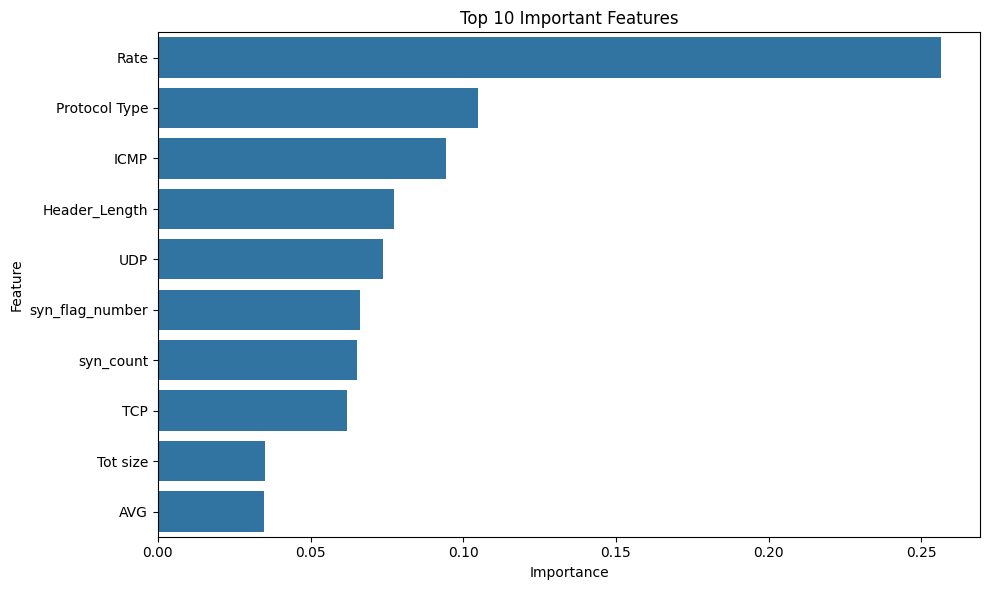

In [ ]:
temp = RandomForestClassifier(n_estimators=100, random_state=42)
temp.fit(X, y)

important = temp.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': important
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [ ]:
print(y.value_counts())


Label
6     64067
14    56832
21    41801
13    37351
12    37197
11    33293
20    24986
19    22198
22     7850
24     6295
23     6154
8      2800
18      271
9        83
5        57
10       49
4        32
7        17
15        1
Name: count, dtype: int64


In [ ]:
# Drop classes with less than 6 samples
from collections import Counter

min_samples = 6
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= min_samples].index

# Filter data
X_filtered = X[y.isin(valid_classes)]
y_filtered = y[y.isin(valid_classes)]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_filtered, y_filtered)

# Then split the resampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"SMOTE-balanced shapes:\nX_train: {X_train.shape}, X_test: {X_test.shape}")

# Combine features and target
resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
resampled_df['Label'] = y_resampled.values

# Sanitize column names for Spark
resampled_df.columns = [col.replace(" ", "_").replace(".", "_") for col in resampled_df.columns]

from google.colab import drive
drive.mount('/content/drive')

resampled_df.to_parquet("/content/drive/MyDrive/603_Project/preprocessed_balanced_data.parquet", index=False)


SMOTE-balanced shapes:
X_train: (922564, 21), X_test: (230642, 21)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
